In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn import metrics
%matplotlib inline

In [2]:
orig_df = pd.read_csv('data_cluster.csv')
orig_df.head()

,Unnamed: 0,Format1,Format2,Format3,Format4,Format5,"Agriculture, forestry and fishing",Mining and quarrying,Manufacturing,"Electricity, gas, steam and air conditioning supply",...,prov_tourist,prov_fram,prov_work,prov_birth,th_worker,debt,percent_import_us,population,Planted_area,export
0,KHON KAEN,5,5,3,4,4,20935.090040,1206.373717,68848.554780,2746.279637,...,3408096,841104,942538.91110,17193.613110,38054.1,143520,79.4864,68971331,100.75753,7550704.1
1,UDON THANI,4,5,3,3,4,18152.075400,6211.990349,14403.956680,1446.947377,...,2559064,3869096,700992.56110,15151.681540,38054.1,143520,79.4864,68971331,100.75753,7550704.1
2,LOEI,2,2,2,2,1,13253.341290,1084.257727,5738.331029,510.443508,...,1274374,2713094,339243.06110,6435.578733,38054.1,143520,79.4864,68971331,100.75753,7550704.1
3,NONG KHAI,2,2,2,1,2,9377.362409,177.441005,6145.417423,439.440877,...,1312482,1132879,87527.96667,1924.393939,38054.1,143520,79.4864,68971331,100.75753,7550704.1
4,MUKDAHAN,1,1,2,1,1,6535.465990,135.829909,3329.313682,303.240067,...,716602,1288544,188990.07220,3821.712397,38054.1,143520,79.4864,68971331,100.75753,7550704.1


<AxesSubplot:>

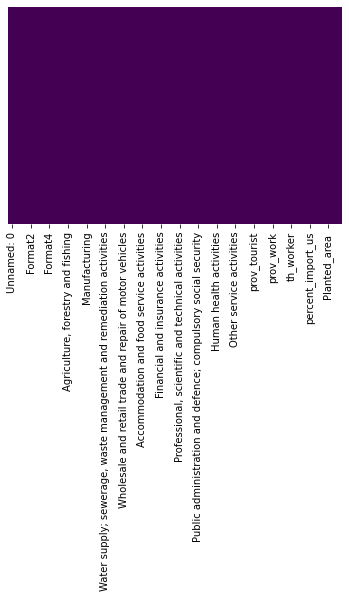

In [3]:
sns.heatmap(orig_df.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [4]:
orig_df.describe()

,Format1,Format2,Format3,Format4,Format5,"Agriculture, forestry and fishing",Mining and quarrying,Manufacturing,"Electricity, gas, steam and air conditioning supply","Water supply; sewerage, waste management and remediation activities",...,prov_tourist,prov_fram,prov_work,prov_birth,th_worker,debt,percent_import_us,population,Planted_area,export
count,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,...,7.700000e+01,7.700000e+01,7.700000e+01,77.000000,7.700000e+01,77.0,7.700000e+01,77.0,7.700000e+01,7.700000e+01
mean,2.818182,2.792208,2.350649,2.168831,2.324675,16258.700336,5190.351500,51439.766224,4846.090909,761.415584,...,2.520645e+06,1.890036e+06,5.237834e+05,9520.884327,3.805410e+04,143520.0,7.948640e+01,68971331.0,1.007575e+02,7.550704e+06
std,1.335027,1.567244,1.211418,1.207461,1.069205,11137.697749,28512.539794,111167.129393,11271.574057,2483.297528,...,5.886666e+06,1.397418e+06,6.843938e+05,11157.179921,5.126569e-11,0.0,1.430404e-13,0.0,2.002566e-13,1.031173e-08
min,1.000000,1.000000,1.000000,1.000000,1.000000,2456.234345,0.000000,648.396626,132.373977,26.000000,...,1.898580e+05,1.097020e+05,7.559077e+04,1458.936088,3.805410e+04,143520.0,7.948640e+01,68971331.0,1.007575e+02,7.550704e+06
25%,2.000000,1.000000,2.000000,1.000000,1.000000,8125.489355,139.125214,3920.757147,524.724612,104.000000,...,6.364880e+05,9.208080e+05,2.548764e+05,4107.758127,3.805410e+04,143520.0,7.948640e+01,68971331.0,1.007575e+02,7.550704e+06
50%,3.000000,3.000000,2.000000,2.000000,2.000000,13901.405230,367.769324,7879.749099,1133.269855,197.000000,...,1.016535e+06,1.667852e+06,3.970205e+05,7240.090579,3.805410e+04,143520.0,7.948640e+01,68971331.0,1.007575e+02,7.550704e+06
75%,4.000000,4.000000,3.000000,3.000000,3.000000,20514.003690,1978.663682,28905.404140,2746.279637,495.000000,...,1.819420e+06,2.674063e+06,5.834849e+05,11226.124630,3.805410e+04,143520.0,7.948640e+01,68971331.0,1.007575e+02,7.550704e+06
max,5.000000,6.000000,5.000000,5.000000,4.000000,59945.066990,248717.731000,600999.717200,56565.043730,21202.000000,...,4.801920e+07,8.384561e+06,5.844446e+06,90331.708430,3.805410e+04,143520.0,7.948640e+01,68971331.0,1.007575e+02,7.550704e+06


In [5]:
orig_df.columns

Index(['Unnamed: 0', 'Format1', 'Format2', 'Format3', 'Format4', 'Format5',
       'Agriculture, forestry and fishing', 'Mining and quarrying',
       'Manufacturing', 'Electricity, gas, steam and air conditioning supply',
       'Water supply; sewerage, waste management and remediation activities',
       'Construction',
       'Wholesale and retail trade and repair of motor vehicles',
       'Transportation and storage',
       'Accommodation and food service activities',
       'Information and communication', 'Financial and insurance activities',
       'Real estate activities',
       'Professional, scientific and technical activities',
       'Administrative and support service activities',
       'Public administration and defence; compulsory social security',
       'Education', 'Human health activities',
       'Arts, entertainment and recreation', 'Other service activities',
       'province_pop', 'prov_tourist', 'prov_fram', 'prov_work', 'prov_birth',
       'th_worker', 'de

In [6]:
df = orig_df[['Accommodation and food service activities',
       'Administrative and support service activities',
       'Mining and quarrying']]
df

,Accommodation and food service activities,Administrative and support service activities,Mining and quarrying
0,3499.423513,623,1206.373717
1,1402.792162,796,6211.990349
2,620.611510,108,1084.257727
3,261.883467,149,177.441005
4,249.025557,57,135.829909
...,...,...,...
72,9021.095235,22624,7.878722
73,4184.691582,4983,132.666192
74,680.838000,2492,764.224076
75,1493.955135,793,2119.227800


In [7]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler() 
array_normalized = scaler.fit_transform(df)
df_normalized = pd.DataFrame(array_normalized)
df_normalized.head()

,0,1,2
0,0.009278,0.004165,0.004850
1,0.003697,0.005356,0.024976
2,0.001615,0.000620,0.004359
3,0.000660,0.000902,0.000713
4,0.000626,0.000268,0.000546


In [8]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler() 
array_normalized = scaler.fit_transform(df)
df_normalized = pd.DataFrame(array_normalized)
df_normalized.head()

,0,1,2
0,0.009278,0.004165,0.004850
1,0.003697,0.005356,0.024976
2,0.001615,0.000620,0.004359
3,0.000660,0.000902,0.000713
4,0.000626,0.000268,0.000546


In [9]:
df_normalized.describe()

,0,1,2
count,77.000000,77.000000,77.000000
mean,0.024054,0.021402,0.020868
std,0.117629,0.115148,0.114638
min,0.000000,0.000000,0.000000
25%,0.000574,0.000337,0.000559
50%,0.001447,0.001225,0.001479
75%,0.006348,0.005680,0.007955
max,1.000000,1.000000,1.000000


Text(0, 0.5, 'SSE')

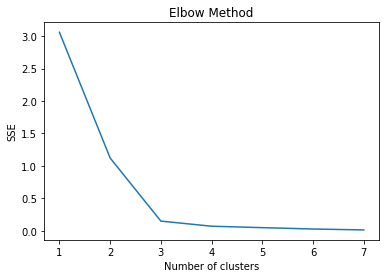

In [10]:
max_k = 8
sse = []
for i in range(1, max_k):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(df_normalized)
    sse.append(kmeans.inertia_)
plt.plot(range(1, max_k), sse)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')

In [11]:
k = 5

In [12]:
kmeans = KMeans(n_clusters=k)
kmeans.fit(df_normalized)

KMeans(n_clusters=5)

In [13]:
cluster_predictions = kmeans.predict(df_normalized)
df['cluster_id'] = cluster_predictions
df

<ipython-input-13-d8e33fd503bb>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cluster_id'] = cluster_predictions


,Accommodation and food service activities,Administrative and support service activities,Mining and quarrying,cluster_id
0,3499.423513,623,1206.373717,0
1,1402.792162,796,6211.990349,0
2,620.611510,108,1084.257727,0
3,261.883467,149,177.441005,0
4,249.025557,57,135.829909,0
...,...,...,...,...
72,9021.095235,22624,7.878722,4
73,4184.691582,4983,132.666192,0
74,680.838000,2492,764.224076,0
75,1493.955135,793,2119.227800,0


In [14]:
df.cluster_id.value_counts()

0    72
3     2
4     1
2     1
1     1
Name: cluster_id, dtype: int64

In [15]:
df.to_csv('cluster23_export11.csv', index=False) 

In [16]:
df[df.cluster_id == 1]

,Accommodation and food service activities,Administrative and support service activities,Mining and quarrying,cluster_id
71,375718.8133,145272,0.0,1


In [17]:
print(metrics.silhouette_score(df,kmeans.labels_))

0.71483861910253


In [18]:
df[df.cluster_id == 0]

,Accommodation and food service activities,Administrative and support service activities,Mining and quarrying,cluster_id
0,3499.423513,623,1206.373717,0
1,1402.792162,796,6211.990349,0
2,620.611510,108,1084.257727,0
3,261.883467,149,177.441005,0
4,249.025557,57,135.829909,0
...,...,...,...,...
70,2648.188052,2610,2261.213780,0
73,4184.691582,4983,132.666192,0
74,680.838000,2492,764.224076,0
75,1493.955135,793,2119.227800,0


# Hierarchical

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram
from sklearn import metrics
%matplotlib inline

In [20]:
# Set up parameter values
linkage_val = 'average'  # 'others are 'complete', 'single', 'ward'
dist_threshold_val = 0   # Set to be zero to plot dendrogram
nclusters_val = None     # if distance_threshold is 0, this must be None

In [21]:
model=AgglomerativeClustering(linkage=linkage_val,n_clusters=nclusters_val,distance_threshold=dist_threshold_val)
model=model.fit(df_normalized)
model

AgglomerativeClustering(distance_threshold=0, linkage='average',
                        n_clusters=None)

In [22]:
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

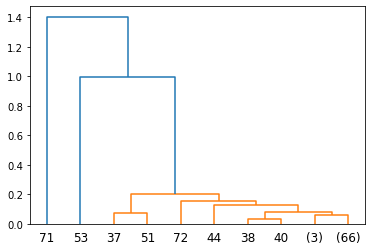

In [23]:
plot_dendrogram(model, truncate_mode='level', p=6)

In [24]:
# Choose the distance threshold from dendrogram
dist_threshold_val = 0.2
nclusters_val = None

In [25]:
model=AgglomerativeClustering(linkage=linkage_val,n_clusters=nclusters_val,distance_threshold=dist_threshold_val)
model=model.fit(df_normalized)
model

AgglomerativeClustering(distance_threshold=0.2, linkage='average',
                        n_clusters=None)

In [26]:
labels = model.labels_
labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0], dtype=int64)

In [27]:
cluster_ids = pd.Series(labels).unique()
cluster_ids

array([0, 1, 2, 3], dtype=int64)

In [28]:
cluster_predictions = model.fit_predict(df_normalized)
df['cluster_id'] = cluster_predictions
df.head(10)

<ipython-input-28-ae44bb92dc01>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cluster_id'] = cluster_predictions


,Accommodation and food service activities,Administrative and support service activities,Mining and quarrying,cluster_id
0,3499.423513,623,1206.373717,0
1,1402.792162,796,6211.990349,0
2,620.611510,108,1084.257727,0
3,261.883467,149,177.441005,0
4,249.025557,57,135.829909,0
5,149.050834,45,521.766558,0
6,291.909925,63,12.963513,0
7,163.238787,30,32.557220,0
8,4109.121023,993,2815.759115,0
9,76.266524,122,34.496799,0


In [29]:
print(metrics.silhouette_score(df,labels))

0.8651882331028672


In [30]:
df.cluster_id.value_counts()

0    73
1     2
3     1
2     1
Name: cluster_id, dtype: int64

# 30 Factor

In [73]:
orig_df = pd.read_csv('data_cluster.csv')
orig_df.head()

,Unnamed: 0,Format1,Format2,Format3,Format4,Format5,"Agriculture, forestry and fishing",Mining and quarrying,Manufacturing,"Electricity, gas, steam and air conditioning supply",...,prov_tourist,prov_fram,prov_work,prov_birth,th_worker,debt,percent_import_us,population,Planted_area,export
0,KHON KAEN,5,5,3,4,4,20935.090040,1206.373717,68848.554780,2746.279637,...,3408096,841104,942538.91110,17193.613110,38054.1,143520,79.4864,68971331,100.75753,7550704.1
1,UDON THANI,4,5,3,3,4,18152.075400,6211.990349,14403.956680,1446.947377,...,2559064,3869096,700992.56110,15151.681540,38054.1,143520,79.4864,68971331,100.75753,7550704.1
2,LOEI,2,2,2,2,1,13253.341290,1084.257727,5738.331029,510.443508,...,1274374,2713094,339243.06110,6435.578733,38054.1,143520,79.4864,68971331,100.75753,7550704.1
3,NONG KHAI,2,2,2,1,2,9377.362409,177.441005,6145.417423,439.440877,...,1312482,1132879,87527.96667,1924.393939,38054.1,143520,79.4864,68971331,100.75753,7550704.1
4,MUKDAHAN,1,1,2,1,1,6535.465990,135.829909,3329.313682,303.240067,...,716602,1288544,188990.07220,3821.712397,38054.1,143520,79.4864,68971331,100.75753,7550704.1


In [74]:
df = orig_df[['Agriculture, forestry and fishing', 'Mining and quarrying',
       'Manufacturing', 'Electricity, gas, steam and air conditioning supply',
       'Water supply; sewerage, waste management and remediation activities',
       'Construction',
       'Wholesale and retail trade and repair of motor vehicles',
       'Transportation and storage',
       'Accommodation and food service activities',
       'Information and communication', 'Financial and insurance activities',
       'Real estate activities',
       'Professional, scientific and technical activities',
       'Administrative and support service activities',
       'Public administration and defence; compulsory social security',
       'Education', 'Human health activities',
       'Arts, entertainment and recreation', 'Other service activities',
       'province_pop', 'prov_tourist', 'prov_fram', 'prov_work', 'prov_birth',
       'th_worker', 'debt', 'percent_import_us', 'population', 'Planted_area ',
       'export']]
df

,"Agriculture, forestry and fishing",Mining and quarrying,Manufacturing,"Electricity, gas, steam and air conditioning supply","Water supply; sewerage, waste management and remediation activities",Construction,Wholesale and retail trade and repair of motor vehicles,Transportation and storage,Accommodation and food service activities,Information and communication,...,prov_tourist,prov_fram,prov_work,prov_birth,th_worker,debt,percent_import_us,population,Planted_area,export
0,20935.090040,1206.373717,68848.554780,2746.279637,765,7271,24525,5113.690205,3499.423513,1196.099541,...,3408096,841104,9.425389e+05,17193.613110,38054.1,143520,79.4864,68971331,100.75753,7550704.1
1,18152.075400,6211.990349,14403.956680,1446.947377,495,4787,14378,3288.299527,1402.792162,937.909456,...,2559064,3869096,7.009926e+05,15151.681540,38054.1,143520,79.4864,68971331,100.75753,7550704.1
2,13253.341290,1084.257727,5738.331029,510.443508,150,1960,5995,818.542586,620.611510,291.752749,...,1274374,2713094,3.392431e+05,6435.578733,38054.1,143520,79.4864,68971331,100.75753,7550704.1
3,9377.362409,177.441005,6145.417423,439.440877,112,1661,4779,2705.046582,261.883467,363.492487,...,1312482,1132879,8.752797e+04,1924.393939,38054.1,143520,79.4864,68971331,100.75753,7550704.1
4,6535.465990,135.829909,3329.313682,303.240067,106,1200,3366,542.375373,249.025557,138.529347,...,716602,1288544,1.889901e+05,3821.712397,38054.1,143520,79.4864,68971331,100.75753,7550704.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,2992.031993,7.878722,291876.560800,15972.097790,2537,10409,97576,163458.489300,9021.095235,4546.785332,...,1037246,212038,1.488496e+06,17193.613110,38054.1,143520,79.4864,68971331,100.75753,7550704.1
73,5789.250519,132.666192,185025.287000,9545.870133,2427,11901,53144,8397.959586,4184.691582,3582.759627,...,679015,510375,1.164412e+06,10650.580060,38054.1,143520,79.4864,68971331,100.75753,7550704.1
74,14103.585590,764.224076,236940.839100,8386.459823,2703,7267,47602,5137.330759,680.838000,2155.632589,...,786698,184861,6.963281e+05,16885.595590,38054.1,143520,79.4864,68971331,100.75753,7550704.1
75,21312.922530,2119.227800,167758.182400,4636.181046,1294,10547,37786,6780.495583,1493.955135,1936.229475,...,1413480,920808,3.820312e+05,8359.685620,38054.1,143520,79.4864,68971331,100.75753,7550704.1


In [75]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler() 
array_normalized = scaler.fit_transform(df)
df_normalized = pd.DataFrame(array_normalized)
df_normalized.head()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,0.321434,0.004850,0.113600,0.046319,0.034898,0.065577,0.022613,0.013493,0.009278,0.004194,...,0.067286,0.088388,0.150281,0.177047,0.0,0.0,0.0,0.0,0.0,0.0
1,0.273024,0.024976,0.022913,0.023295,0.022148,0.041159,0.012737,0.008452,0.003697,0.003207,...,0.049535,0.454315,0.108410,0.154071,0.0,0.0,0.0,0.0,0.0,0.0
2,0.187812,0.004359,0.008478,0.006699,0.005856,0.013369,0.004577,0.001631,0.001615,0.000736,...,0.022675,0.314615,0.045703,0.055997,0.0,0.0,0.0,0.0,0.0,0.0
3,0.120391,0.000713,0.009156,0.005441,0.004061,0.010430,0.003394,0.006841,0.000660,0.001011,...,0.023471,0.123649,0.002069,0.005237,0.0,0.0,0.0,0.0,0.0,0.0
4,0.070957,0.000546,0.004466,0.003028,0.003778,0.005898,0.002019,0.000869,0.000626,0.000150,...,0.011013,0.142461,0.019657,0.026586,0.0,0.0,0.0,0.0,0.0,0.0


In [76]:
df_normalized.describe()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
count,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,...,77.000000,77.000000,77.000000,77.000000,77.0,77.0,77.0,77.0,77.0,77.0
mean,0.240090,0.020868,0.084603,0.083528,0.034729,0.044739,0.026246,0.030379,0.024054,0.016382,...,0.048731,0.215150,0.077692,0.090713,0.0,0.0,0.0,0.0,0.0,0.0
std,0.193737,0.114638,0.185170,0.199735,0.117269,0.116421,0.113888,0.124740,0.117629,0.113886,...,0.123076,0.168875,0.118636,0.125541,0.0,0.0,0.0,0.0,0.0,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
25%,0.098615,0.000559,0.005451,0.006953,0.003683,0.010794,0.003207,0.001509,0.000574,0.000662,...,0.009338,0.098021,0.031078,0.029805,0.0,0.0,0.0,0.0,0.0,0.0
50%,0.199085,0.001479,0.012045,0.017736,0.008075,0.019818,0.006899,0.003677,0.001447,0.001350,...,0.017284,0.188299,0.055718,0.065050,0.0,0.0,0.0,0.0,0.0,0.0
75%,0.314109,0.007955,0.047067,0.046319,0.022148,0.041159,0.014735,0.013312,0.006348,0.002910,...,0.034070,0.309898,0.088041,0.109901,0.0,0.0,0.0,0.0,0.0,0.0
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,0.0,0.0,0.0,0.0,0.0,0.0


Text(0, 0.5, 'SSE')

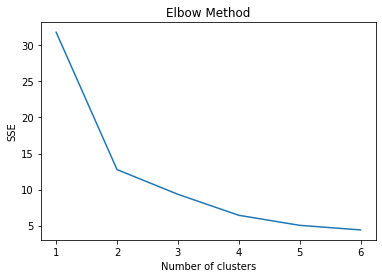

In [77]:
max_k = 7
sse = []
for i in range(1, max_k):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(df_normalized)
    sse.append(kmeans.inertia_)
plt.plot(range(1, max_k), sse)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')

In [78]:
k = 5
kmeans = KMeans(n_clusters=k)
kmeans.fit(df_normalized)

KMeans(n_clusters=5)

In [79]:
cluster_predictions = kmeans.predict(df_normalized)
df['cluster_id'] = cluster_predictions
df

<ipython-input-79-d8e33fd503bb>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cluster_id'] = cluster_predictions


,"Agriculture, forestry and fishing",Mining and quarrying,Manufacturing,"Electricity, gas, steam and air conditioning supply","Water supply; sewerage, waste management and remediation activities",Construction,Wholesale and retail trade and repair of motor vehicles,Transportation and storage,Accommodation and food service activities,Information and communication,...,prov_fram,prov_work,prov_birth,th_worker,debt,percent_import_us,population,Planted_area,export,cluster_id
0,20935.090040,1206.373717,68848.554780,2746.279637,765,7271,24525,5113.690205,3499.423513,1196.099541,...,841104,9.425389e+05,17193.613110,38054.1,143520,79.4864,68971331,100.75753,7550704.1,0
1,18152.075400,6211.990349,14403.956680,1446.947377,495,4787,14378,3288.299527,1402.792162,937.909456,...,3869096,7.009926e+05,15151.681540,38054.1,143520,79.4864,68971331,100.75753,7550704.1,2
2,13253.341290,1084.257727,5738.331029,510.443508,150,1960,5995,818.542586,620.611510,291.752749,...,2713094,3.392431e+05,6435.578733,38054.1,143520,79.4864,68971331,100.75753,7550704.1,3
3,9377.362409,177.441005,6145.417423,439.440877,112,1661,4779,2705.046582,261.883467,363.492487,...,1132879,8.752797e+04,1924.393939,38054.1,143520,79.4864,68971331,100.75753,7550704.1,3
4,6535.465990,135.829909,3329.313682,303.240067,106,1200,3366,542.375373,249.025557,138.529347,...,1288544,1.889901e+05,3821.712397,38054.1,143520,79.4864,68971331,100.75753,7550704.1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,2992.031993,7.878722,291876.560800,15972.097790,2537,10409,97576,163458.489300,9021.095235,4546.785332,...,212038,1.488496e+06,17193.613110,38054.1,143520,79.4864,68971331,100.75753,7550704.1,0
73,5789.250519,132.666192,185025.287000,9545.870133,2427,11901,53144,8397.959586,4184.691582,3582.759627,...,510375,1.164412e+06,10650.580060,38054.1,143520,79.4864,68971331,100.75753,7550704.1,0
74,14103.585590,764.224076,236940.839100,8386.459823,2703,7267,47602,5137.330759,680.838000,2155.632589,...,184861,6.963281e+05,16885.595590,38054.1,143520,79.4864,68971331,100.75753,7550704.1,0
75,21312.922530,2119.227800,167758.182400,4636.181046,1294,10547,37786,6780.495583,1493.955135,1936.229475,...,920808,3.820312e+05,8359.685620,38054.1,143520,79.4864,68971331,100.75753,7550704.1,0


In [80]:
df.cluster_id.value_counts()

3    41
2    22
0    11
4     2
1     1
Name: cluster_id, dtype: int64

In [81]:
print(metrics.silhouette_score(df,kmeans.labels_))

-0.017660797667249383


In [82]:
df[df.cluster_id == 1]

,"Agriculture, forestry and fishing",Mining and quarrying,Manufacturing,"Electricity, gas, steam and air conditioning supply","Water supply; sewerage, waste management and remediation activities",Construction,Wholesale and retail trade and repair of motor vehicles,Transportation and storage,Accommodation and food service activities,Information and communication,...,prov_fram,prov_work,prov_birth,th_worker,debt,percent_import_us,population,Planted_area,export,cluster_id
71,2478.697583,0.0,600999.7172,38797.57672,21202,102327,1028711,362345.1983,375718.8133,261626.3171,...,233459,5844445.693,90331.70843,38054.1,143520,79.4864,68971331,100.75753,7550704.1,1


In [72]:
df.to_csv('cluster23_export30.csv', index=False) 

In [ ]:
# หมายเหตุ หลังจากกลับมารันอีกรอบค่าก็เปลี่ยนไปอาจเกิดจากค่าที่อยู่กึ่งกลางย้ายฝั่ง แต่ในที่นี่เราต้องการกำหนดจำนวนกลุ่มของข้อมูลให้เป็นไปตาม Format 3